<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 2: Generate Descriptive Statistics and Visualizations

Distribution of the Median value of owner-occupied homes

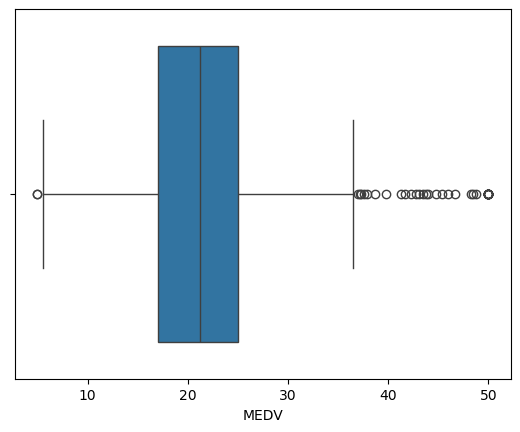

In [11]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.show()

In [12]:
print("media: ", boston_df['MEDV'].mean())
print("median: ", boston_df['MEDV'].median())
print("std: ", boston_df['MEDV'].std())

media:  22.532806324110677
median:  21.2
std:  9.197104087379818


The box appears to extend from approximately 17 to 25, suggesting that the 50% of the owner-occupied homes have an average value between 17 and 25 thousand dollars. There are some outliers, all of them above the upper whisker. These values appears to be between 36 and 56. The median is sightly lower than the mean suggesting a slight positive skew in the distribution. A standard deviation of 9.2 suggests that there is a considerable dispersion in home values.

In [13]:
# Provide a  bar plot for the Charles river variable
limitantes = boston_df.groupby('CHAS').agg({
    'CHAS': 'count'
}).rename(columns= {'CHAS':'LIMITANTES'}).reset_index()
limitantes

,CHAS,LIMITANTES
0,0.0,471
1,1.0,35


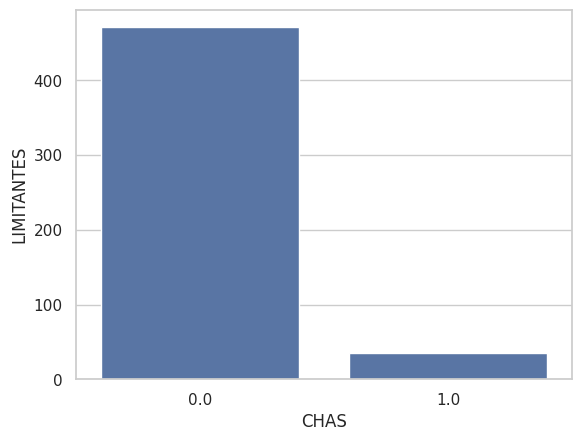

In [14]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="LIMITANTES", data=limitantes)
plt.show()

In [15]:
limitantes['PERCENT'] = 100*limitantes['LIMITANTES']/limitantes['LIMITANTES'].sum()
limitantes

,CHAS,LIMITANTES,PERCENT
0,0.0,471,93.083004
1,1.0,35,6.916996


Most of the houses described in the dataset are not bounding by the Charles River. In fact, only 6% of the houses are bounded by the river.

### Distribution of the Median value of owner-occupied homes by age groups

In [16]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [17]:
boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >= 35 )&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

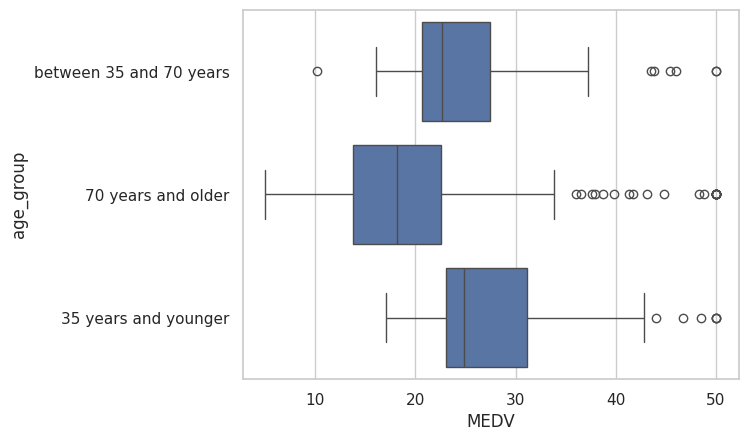

In [18]:
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
plt.show()

In [19]:
print('MEDIA GRUPO 1: ', boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'].mean())
print('MEDIANA GRUPO 1: ', boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'].median())
print('STD GRUPO 1: ', boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'].std())

MEDIA GRUPO 1:  24.94765625
MEDIANA GRUPO 1:  22.6
STD GRUPO 1:  6.969370161487669


In [20]:
print('MEDIA GRUPO 2: ', boston_df[boston_df['age_group'] == '70 years and older']['MEDV'].mean())
print('MEDIANA GRUPO 2: ', boston_df[boston_df['age_group'] == '70 years and older']['MEDV'].median())
print('STD GRUPO 2: ', boston_df[boston_df['age_group'] == '70 years and older']['MEDV'].std())

MEDIA GRUPO 2:  19.793379790940765
MEDIANA GRUPO 2:  18.2
STD GRUPO 2:  9.51537537919565


In [21]:
print('MEDIA GRUPO 3: ', boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'].mean())
print('MEDIANA GRUPO 3: ', boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'].median())
print('STD GRUPO 3: ', boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'].std())

MEDIA GRUPO 3:  27.77582417582417
MEDIANA GRUPO 3:  24.8
STD GRUPO 3:  7.638198459196755


In [22]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail 
# business acres per town. What can you say about the relationship?

In [23]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail 
# business acres per town. What can you say about the relationship?

Based on the scatter plot it is observed a correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. The correlation is positive since as Nitric oxide concentrations increases, the proportion of non-retail business acres per town also increases

In [24]:
# Create a histogram for the pupil to teacher ratio variable

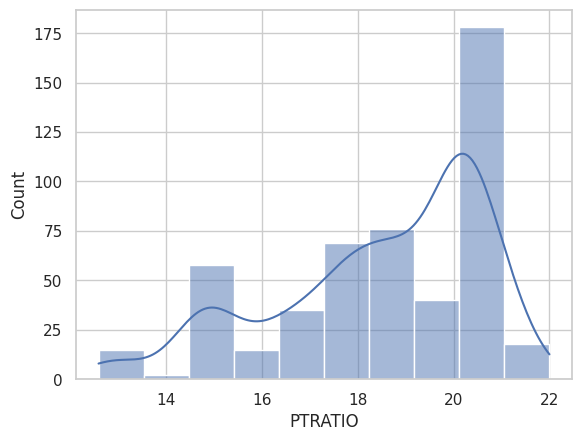

In [25]:
sns.histplot(x='PTRATIO', data=boston_df, kde=True, bins=10)
plt.show()

The histogram indicates a slight positive trend among the data. A bias is observed in the values between 19 and 21. And it is in the range between 20 and 21 where the data is most grouped.

### Task 3: Use the appropriate tests to answer the questions provided.

State your hypothesis. Use α = 0.05 Perform the test Statistics. State the conclusion from the test.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [26]:
boston_df['CHAS'].unique()

array([0., 1.])

In [27]:
# We can use the Levene's Test in Python to check test significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is lower than 0.05 we can not assume equality of variance.

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'],equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

"there is no difference in values for each proportion of owner occupied units built prior to 1940")$H_1: ("At leas one of the means differ")

In [29]:
boston_df['age_group'].unique()

array(['between 35 and 70 years', '70 years and older',
       '35 years and younger'], dtype=object)

In [30]:
# Using the age groups
# Test for equally of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [31]:
# since the p-value is greater than 0.05, the variance are equal

In [32]:
group1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [33]:
f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


since p-value is less than alpha 0.05 we reject the null hiphotesis as at least one of the means differ.
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

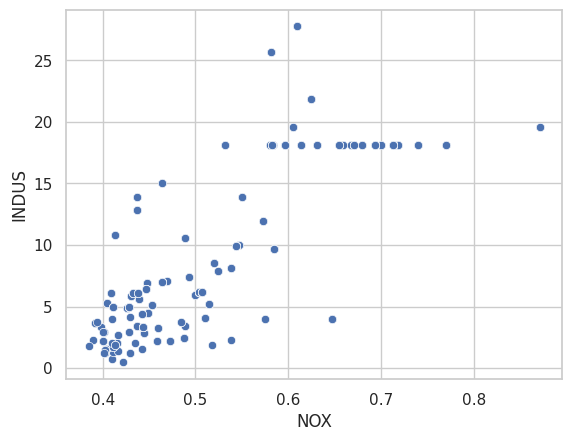

In [34]:
# Draw a scatter plot to see if there is a correlation
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value is less than 0.05 we reject the null hypothesis and conclude that there is a correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [36]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [37]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        20:16:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Coefficient for the DIS variable of 1.0916 indicates that for each additional unit in weighted distance to the five Boston employment centers, the median value of owner occupied homes increases by 1.0916 units.
